In [79]:
#Importación de librerías

import numpy as np
import matplotlib, pylab as plt
from scipy import integrate

 Figure 5.7 shows a current loop of radius a carrying a current I. The point P
is a distance r from the center of the loop with spherical coordinates (r, θ, φ).
Jackson (1988) solves for the φ component of the vector potential at point P
in terms of elliptic integrals:

\begin{equation}
A_{\phi}(r, \theta)=\frac{\mu_0}{4\pi}\frac{4Ia}{\sqrt{a^2+r^2+2ar\sin \theta}}\left(\frac{(2-k^2)K(k)-2E(k)}{k^2} \right)
\end{equation}


where 

\begin{equation}
K(k)=\int_{0}^{\pi/2} \frac{\mathrm{d\phi}}{\sqrt{1-k^2\sin^2\phi}}
\end{equation}


\begin{equation}
E(k)=\int_{0}^{\pi/2} \mathrm{d\phi} \sqrt{1-k^2\sin^2\phi}
\end{equation}


\begin{equation}
k^2=\frac{4ar\sin\theta}{a^2+r^2+2ar\sin\theta}
\end{equation}



Here K(k) is a complete elliptic integral of the first kind and E(k) is a complete
elliptic integral of the second kind. For a = 1, I = 3, and μ0∕4π = 1, compute
and plot

$
a) Aφ(r = 1.1, θ) vs. θ. \\
b) Aφ(r, θ = π∕3) vs. r
$

In [2]:
#Primero definamos a k en términos de theta

def k_c(θ, a, r):
  num = 4*a*r*np.sin(θ)
  den = a**2 + r**2 + 2*a*r*np.sin(θ)
  k = num / den

  return k

In [3]:
#Definimos dos intervalos. Uno para los ángulos θ, y otro para las distancias r.

θ = np.linspace(0,np.deg2rad(90), 100)
r = np.linspace(0,1.1,11)

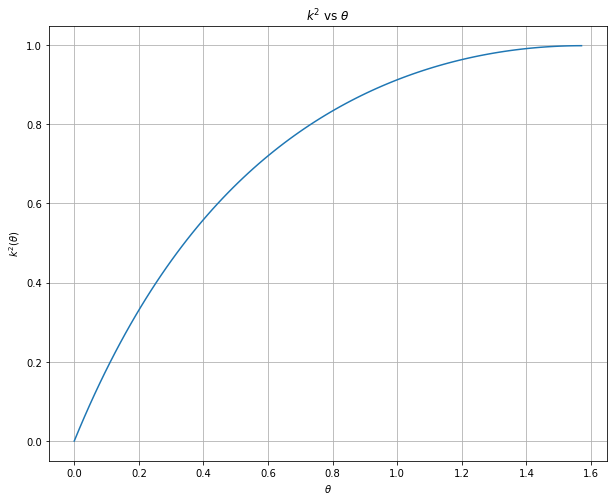

In [4]:
#Graficamos k respecto a θ, con r fijo igual a 1.1

plt.figure( figsize = (10,8) )

plt.plot( θ, k_c(θ, 1, 1.1) )
plt.xlabel( '$\\theta$' )
plt.ylabel( '$k^2(\\theta)$' )
plt.title('$k^2$ vs $\\theta$')

plt.grid()

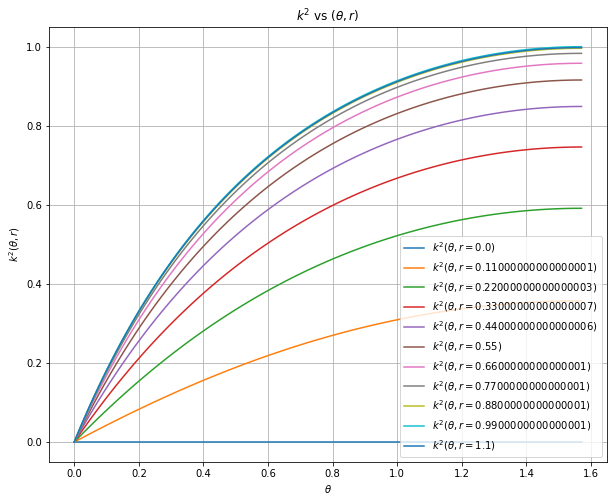

In [5]:
#Graficamos k respecto a θ, con r variando entre 0 y 1.1

plt.figure(figsize=(10,8))

for i in r:
  plt.plot( θ, k_c(θ, 1, i), label = f'$k^2(θ, r = {i})$' )

plt.xlabel( '$\\theta$' )
plt.ylabel( '$k^2(\\theta, r)$' )
plt.title('$k^2$ vs $(\\theta,r)$')

plt.legend()
plt.grid()

In [6]:
#Definimos la función K(k)

def K( k, ϕ ):
  term = np.sqrt( 1 - k*(np.sin(ϕ))**2 )
  Term = 1 / term
  return Term

In [7]:
ϕ = np.linspace( 0, np.pi/2, 100 )

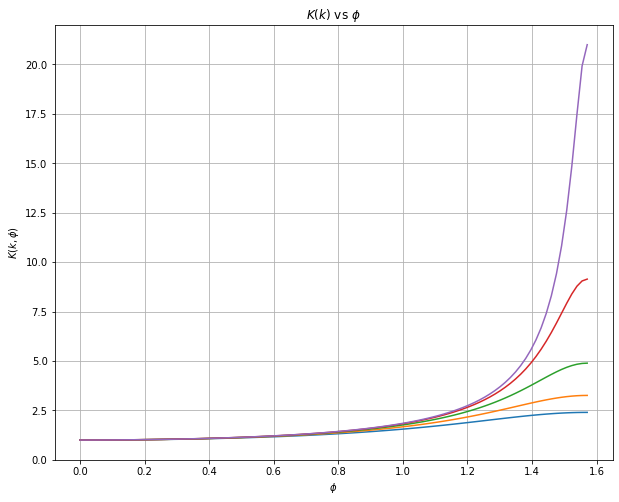

In [8]:
#Graficamos K(k) vs ϕ, para algunos ángulos 0.

plt.figure( figsize = (10,8) )

theta = np.linspace( np.pi/4, np.pi/2, 5 )
k_2 = k_c(theta,1,1.1)

for i in k_2:
  plt.plot( ϕ, K(i, ϕ) )

plt.xlabel( '$\\phi$' )
plt.ylabel( '$K(k, \\phi)$' )
plt.title('$K(k)$ vs $\\phi$')

plt.grid()

In [80]:
#Integral de K(k) para un k^2 en específico

#Parámetros que tomamos fijos
theta1 = np.pi/3
a = 1
r = 1.1

ϕ = np.linspace( 0, np.pi/2, 100 )
k2 = k_c(theta1,a,r)
y = K(k2,ϕ)
I_1 = integrate.trapz(y,ϕ)
I_1

2.7202664767717355

In [11]:
#Definimos la función E(k)

def E( k, ϕ ):
  term = np.sqrt( 1 - k*(np.sin(ϕ))**2 )
  return term

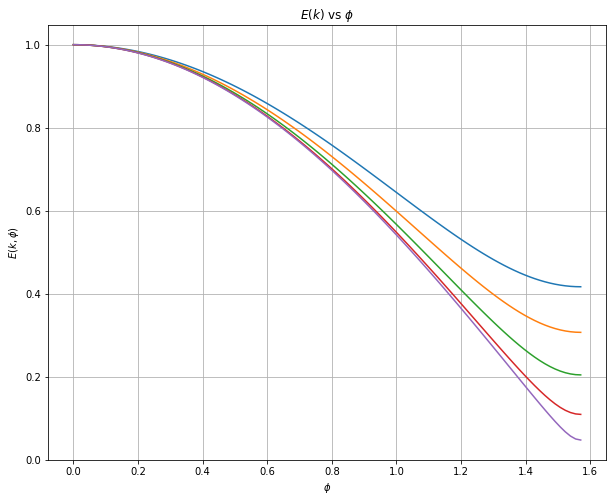

In [12]:
#Graficamos K(k) vs ϕ, para algunos ángulos 0.

plt.figure( figsize = (10,8) )

theta = np.linspace( np.pi/4, np.pi/2, 5 )
k_2 = k_c(theta,1,1.1)

for i in k_2:
  plt.plot( ϕ, E(i, ϕ) )

plt.xlabel( '$\\phi$' )
plt.ylabel( '$E(k, \\phi)$' )
plt.title('$E(k)$ vs $\\phi$')

plt.grid()

In [82]:
#Integral de E(k) para un k^2 en específico

#Parámetros que tomamos fijos
theta1 = np.pi/3
a = 1
r = 1.1

ϕ = np.linspace( 0, np.pi/2, 100 )
k2 = k_c(theta1,a,r)
y = E(k2,ϕ)
I_2 = integrate.trapz(y,ϕ)
I_2

1.08272970688096

\begin{equation}
A_{\phi}(r, \theta)=\frac{\mu_0}{4\pi}\frac{4Ia}{\sqrt{a^2+r^2+2ar\sin \theta}}\left(\frac{(2-k^2)K(k)-2E(k)}{k^2} \right)
\end{equation}


In [83]:
#Definimos la función de potencial

def A_ϕ( I, a, r, θ, cte ):
  
  term1 = 4*I*a
  term2 = np.sqrt(a**2 + r**2 + 2*a*r*np.sin(θ))

  k_ = k_c(θ,a,r)
  term3 = (2 - k_)*I_1 - 2*I_2
  term4 = term3 / k_
  
  Term1 = term1 / term2
  Term = cte*Term1*term4

  return Term

In [84]:
#Definimos un intervalo de ángulos para evaluar el potencial, y lo convertimos a una lista

θ = np.linspace(np.deg2rad(1),np.deg2rad(90), 100)
θ = list(θ)

In [85]:
#Parámetros que tomamos fijos
r = 1.1
a = 1.0
I = 3.0

A_p = np.zeros(len(θ))  #Definimos un array de ceros (array vacío)


#LLenamos el array con el potencial evaluado en cada ángulo que definimos antes
for i in θ:
  j = θ.index(i)
  A_p[j] = A_ϕ(I, a, r, i, cte=1)

A_p

array([745.64573534, 385.65625212, 257.10464793, 191.15273048,
       151.06435538, 124.14400533, 104.83618887,  90.32472996,
        79.0296894 ,  69.99611298,  62.61281862,  56.47048563,
        51.28468011,  46.85160681,  43.02142874,  39.68152213,
        36.74560266,  34.14645389,  31.83093837,  29.75649718,
        27.88864429,  26.19914076,  24.66464302,  23.26568745,
        21.98591765,  20.8114892 ,  19.73060624,  18.73315691,
        17.81042397,  16.95485307,  16.15986572,  15.41970722,
        14.72932214,  14.08425175,  13.4805489 ,  12.91470715,
        12.38360127,  11.88443719,  11.41470958,  10.97216579,
        10.5547751 ,  10.16070227,   9.78828488,   9.43601364,
         9.10251544,   8.78653852,   8.48693957,   8.20267244,
         7.93277823,   7.67637656,   7.43265789,   7.20087669,
         6.98034543,   6.7704292 ,   6.57054095,   6.3801372 ,
         6.19871427,   6.0258048 ,   5.86097476,   5.70382063,
         5.55396694,   5.41106403,   5.27478601,   5.14

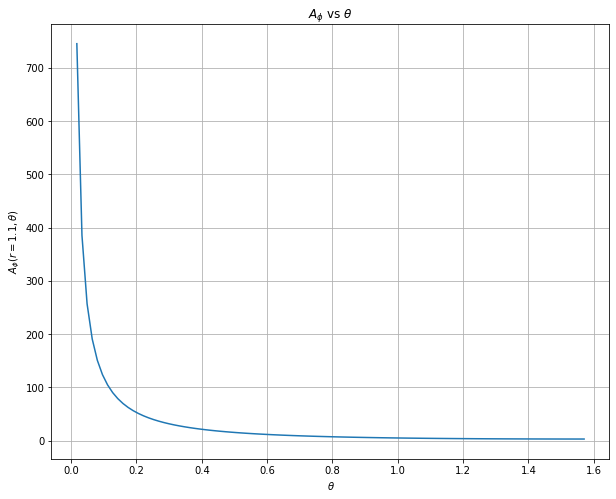

In [86]:
#Graficamos el potencial en función del ángulo theta.

plt.figure( figsize = (10,8) )

plt.plot(θ, A_p)
plt.xlabel( '$\\theta$' )
plt.ylabel( '$A_\\phi(r = 1.1, \\theta)$' )
plt.title('$A_\\phi$ vs $\\theta$')

plt.grid()

In [88]:
#Definimos un intervalo de distancias r para evaluar el potencial, y lo convertimos a una lista


r_ = np.linspace(1E-1,1.1,100)
r_ = list(r_)

In [89]:
#Parámetros que tomamos fijos
theta = np.pi/3
a = 1.0
I = 3.0

Ap = np.zeros(len(r_))  #Definimos un array de ceros (array vacío)

#LLenamos el array con el potencial evaluado en cada distancia r que definimos antes
for i in r_:
  j = r_.index(i)
  Ap[j] = A_ϕ(I, a, i, theta, cte=1)

Ap

array([93.39776807, 83.24708517, 74.84204862, 67.77590443, 61.75896751,
       56.57933649, 52.07843313, 48.13522596, 44.65574207, 41.56590852,
       38.8065521 , 36.32983457, 34.09666452, 32.07478745, 30.23735518,
       28.5618401 , 27.02920087, 25.62323432, 24.33006657, 23.13774994,
       22.03594071, 21.01563939, 20.06897996, 19.18905744, 18.36978605,
       17.60578173, 16.8922643 , 16.22497555, 15.60011024, 15.01425785,
       14.46435298, 13.94763309, 13.46160229, 13.00400018, 12.57277497,
       12.16606016, 11.7821543 , 11.41950336, 11.07668523, 10.75239623,
       10.44543914, 10.15471274,  9.87920247,  9.61797222,  9.370157  ,
        9.13495643,  8.9116289 ,  8.69948636,  8.49788972,  8.30624458,
        8.12399751,  7.95063265,  7.78566863,  7.62865582,  7.47917378,
        7.33682905,  7.20125301,  7.07210002,  6.94904573,  6.83178548,
        6.72003289,  6.61351853,  6.51198874,  6.41520452,  6.32294053,
        6.23498414,  6.15113459,  6.07120221,  5.99500768,  5.92

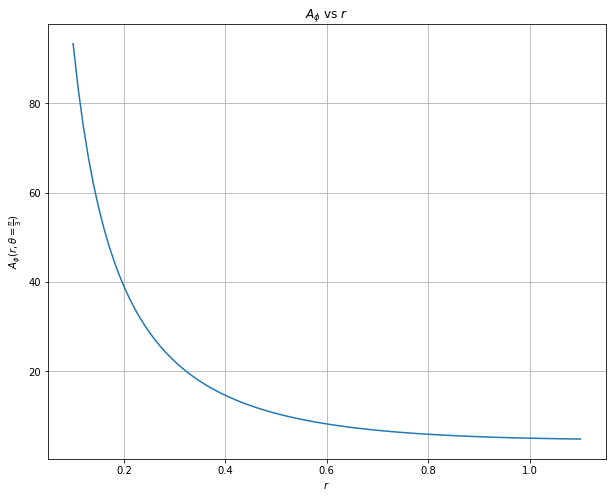

In [90]:
#Graficamos el potencial en función de la distancia r.

plt.figure( figsize = (10,8) )

plt.plot(r_, Ap)
plt.xlabel( '$r$' )
plt.ylabel( '$A_\\phi(r, \\theta=\\frac{\\pi}{3})$' )
plt.title('$A_\\phi$ vs $r$')

plt.grid()

\begin{equation}
K(m)=\int_{0}^{\pi/2} \frac{\mathrm{d\phi}}{\sqrt{1-m\sin^2\phi}}
\end{equation}

\begin{equation}
\approx a_0+a_1m_1+a_2m_2 - [ b_0+b_1m_1+b_2m_1^2]\ln m_1 + \epsilon(m) 
\end{equation}



$m_1 = 1-m$, 

$ 0 \le m \le1 $

$\epsilon(m)\leq 3\times 10^{-5}$



$a_0 = 1.3862944$

$b_0 = 0.5$

$a_1 = 0.1119723$

$b_1 = 0.1213478$

$a_2 = 0.00725296$

$b_2 = 0.0288729$

In [78]:
k2  #k^2 con el que se evaluó la integral de K(k)

0.9259477126225033

In [74]:
#Definición de los parámetros a usar

epsilon = 3E-5
m = k2           #Tomamos el valor de k^2 con el que se evaluó la integral de K(k)
m1 = 1 - m
a0 = 1.3862944
b0 = 0.5
a1 = 0.1119723
b1 = 0.1213478
a2 = 0.00725296
b2 = 0.0288729

In [75]:
#Resultado de la aproximación a la integral

I = a0 + a1*m1 + a2*m1 - (b0 + b1*m1 + b2*m1**2 )*np.log(m1) + epsilon
I

2.720447988867502

In [77]:
#Ahora, nótese que la diferencia entre la integral, de K(k) y esta aproximación da una precisión a la aproximación de 1E-4.

I - I_1

0.00018151209576666716